In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy import integrate

In [8]:
def rk4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

In [9]:
def rk4_reverse(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = -( t[i+1] - t[i] )
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y

In [10]:
def MyModel_M_Cr_Copt(X, t, A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr):
    
    x1, x5 = X
    
    dotx1 = ( 1 + rho_C3*((A*(1+aC))/(A+aC)) ) * x1 - g*x1*x1 - gT*x1 - s15*x5*np.exp(-k5*A)*x1
    
    dotx5 = d - d*x5 + M*x1*((Cr-x1)/(Copt**2+x1*(Cr-2*Copt)))*x5 
    
    return np.array([dotx1, dotx5])

In [11]:
A = 0

k5 = 0.04

rho_C3 = 1

aC = 0.2

M = 0.225

Copt = 0.00003

g = 1/6

gT = 0.3

d = 0.23

s15 = 0.5

Cr = 0.0001

In [12]:
# Extinct or Dormant Cancer: 

e1x = 3.08396*10**(-6)
e1y = 1.4 

# Extinction Threshold or Allee Equi: 

e2x = 0.0000852343 
e2y = 1.39997

# Carrying Capacity of cancer: 

e3x = 4.19997 
e3y = 9.73571*10**(-6)

In [13]:
Nt = 1000000
tmax = 100
t = np.linspace(0.,tmax, Nt)

x0=[e2x,e2y+0.00001]
rk4_MyModel = rk4_reverse(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_us, x5_us = Xs.T

Nt = 20000
tmax = 200
t = np.linspace(0.,tmax, Nt)

x0=[e2x,e2y-0.00001]
rk4_MyModel = rk4_reverse(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_ls, x5_ls = Xs.T

Nt = 1000000
tmax = 100
t = np.linspace(0.,tmax, Nt)

x0=[e2x+0.000001,e2y]
rk4_MyModel = rk4(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_ru, x5_ru = Xs.T

Nt = 20000
tmax = 200
t = np.linspace(0.,tmax, Nt)

x0=[e2x-0.000001,e2y]
rk4_MyModel = rk4(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_lu, x5_lu = Xs.T

x0=[10**(-8),1]
rk4_MyModel = rk4(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_samp, x5_samp = Xs.T

<ipython-input-10-4dfd3b74510a>:5: RuntimeWarning: overflow encountered in double_scalars
  dotx1 = ( 1 + rho_C3*((A*(1+aC))/(A+aC)) ) * x1 - g*x1*x1 - gT*x1 - s15*x5*np.exp(-k5*A)*x1
<ipython-input-10-4dfd3b74510a>:7: RuntimeWarning: overflow encountered in double_scalars
  dotx5 = d - d*x5 + M*x1*((Cr-x1)/(Copt**2+x1*(Cr-2*Copt)))*x5
<ipython-input-10-4dfd3b74510a>:5: RuntimeWarning: invalid value encountered in double_scalars
  dotx1 = ( 1 + rho_C3*((A*(1+aC))/(A+aC)) ) * x1 - g*x1*x1 - gT*x1 - s15*x5*np.exp(-k5*A)*x1
<ipython-input-10-4dfd3b74510a>:7: RuntimeWarning: invalid value encountered in double_scalars
  dotx5 = d - d*x5 + M*x1*((Cr-x1)/(Copt**2+x1*(Cr-2*Copt)))*x5


In [14]:
A = 0

k5 = 0.04

rho_C3 = 1

aC = 0.2

M = 0.225

Copt = 0.00003

g = 1/6

gT = 0.3

d = 0.23

s15 = 0.233613

Cr = 0.0001

In [15]:
# Extinct or Dormant Cancer: 

e1x_at_het = 9.72458*10**(-6)
e1y_at_het = 2.9964 

# Extinction Threshold or Allee Equi: 

e2x_at_het = 0.0000630328 
e2y_at_het = 2.99636 

# Carrying Capacity of cancer: 

e3x_at_het = 4.19999 
e3y_at_het = 9.73567*10**(-6)

In [16]:
Nt = 1000000
tmax = 100
t = np.linspace(0.,tmax, Nt)

x0=[e2x_at_het,e2y_at_het+0.00001]
rk4_MyModel = rk4_reverse(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_us_at_het, x5_us_at_het = Xs.T

Nt = 20000
tmax = 200
t = np.linspace(0.,tmax, Nt)

x0=[e2x_at_het,e2y_at_het-0.00001]
rk4_MyModel = rk4_reverse(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_ls_at_het, x5_ls_at_het = Xs.T

Nt = 1000000
tmax = 100
t = np.linspace(0.,tmax, Nt)

x0=[e2x_at_het+0.000001,e2y_at_het]
rk4_MyModel = rk4(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_ru_at_het, x5_ru_at_het = Xs.T

Nt = 20000
tmax = 200
t = np.linspace(0.,tmax, Nt)

x0=[e2x_at_het-0.000001,e2y_at_het]
rk4_MyModel = rk4(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_lu_at_het, x5_lu_at_het = Xs.T

Nt = 1000000
tmax = 100
t = np.linspace(0.,tmax, Nt)

x0=[10**(-8),1]
rk4_MyModel = rk4(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_samp_at_het, x5_samp_at_het = Xs.T

<ipython-input-10-4dfd3b74510a>:5: RuntimeWarning: overflow encountered in double_scalars
  dotx1 = ( 1 + rho_C3*((A*(1+aC))/(A+aC)) ) * x1 - g*x1*x1 - gT*x1 - s15*x5*np.exp(-k5*A)*x1
<ipython-input-10-4dfd3b74510a>:7: RuntimeWarning: overflow encountered in double_scalars
  dotx5 = d - d*x5 + M*x1*((Cr-x1)/(Copt**2+x1*(Cr-2*Copt)))*x5
<ipython-input-10-4dfd3b74510a>:5: RuntimeWarning: invalid value encountered in double_scalars
  dotx1 = ( 1 + rho_C3*((A*(1+aC))/(A+aC)) ) * x1 - g*x1*x1 - gT*x1 - s15*x5*np.exp(-k5*A)*x1
<ipython-input-10-4dfd3b74510a>:7: RuntimeWarning: invalid value encountered in double_scalars
  dotx5 = d - d*x5 + M*x1*((Cr-x1)/(Copt**2+x1*(Cr-2*Copt)))*x5


In [17]:
# Extinct or Dormant Cancer: 

e1x_after_het = 0.0000109879
e1y_after_het = 3.49999 

# Extinction Threshold or Allee Equi: 

e2x_after_het = 0.000059806
e2y_after_het = 3.49995 

# Carrying Capacity of cancer: 

e3x_after_het = 4.19999
e3y_after_het = 9.73567*10**(-6)

In [18]:
A = 0

k5 = 0.04

rho_C3 = 1

aC = 0.2

M = 0.225

Copt = 0.00003

g = 1/6

gT = 0.3

d = 0.23

s15 = 0.2

Cr = 0.0001

In [19]:
Nt = 1000000
tmax = 100
t = np.linspace(0.,tmax, Nt)

x0=[e2x_after_het,e2y_after_het+0.00001]
rk4_MyModel = rk4_reverse(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_us_after_het, x5_us_after_het = Xs.T

Nt = 20000
tmax = 200
t = np.linspace(0.,tmax, Nt)

x0=[e2x_after_het,e2y_after_het-0.00001]
rk4_MyModel = rk4_reverse(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_ls_after_het, x5_ls_after_het = Xs.T

Nt = 1000000
tmax = 100
t = np.linspace(0.,tmax, Nt)

x0=[e2x_after_het+0.000001,e2y_after_het]
rk4_MyModel = rk4(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_ru_after_het, x5_ru_after_het = Xs.T

Nt = 20000
tmax = 200
t = np.linspace(0.,tmax, Nt)

x0=[e2x_after_het-0.000001,e2y_after_het]
rk4_MyModel = rk4(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_lu_after_het, x5_lu_after_het = Xs.T

Nt = 1000000
tmax = 100
t = np.linspace(0.,tmax, Nt)

x0=[10**(-8),1]
rk4_MyModel = rk4(MyModel_M_Cr_Copt, x0, t, args = (A, k5, rho_C3, aC, M, Copt, g, gT, d, s15, Cr))
t, Xs = rk4_MyModel
x1_samp_after_het, x5_samp_after_het = Xs.T

<ipython-input-10-4dfd3b74510a>:5: RuntimeWarning: overflow encountered in double_scalars
  dotx1 = ( 1 + rho_C3*((A*(1+aC))/(A+aC)) ) * x1 - g*x1*x1 - gT*x1 - s15*x5*np.exp(-k5*A)*x1
<ipython-input-10-4dfd3b74510a>:7: RuntimeWarning: overflow encountered in double_scalars
  dotx5 = d - d*x5 + M*x1*((Cr-x1)/(Copt**2+x1*(Cr-2*Copt)))*x5
<ipython-input-10-4dfd3b74510a>:5: RuntimeWarning: invalid value encountered in double_scalars
  dotx1 = ( 1 + rho_C3*((A*(1+aC))/(A+aC)) ) * x1 - g*x1*x1 - gT*x1 - s15*x5*np.exp(-k5*A)*x1
<ipython-input-10-4dfd3b74510a>:7: RuntimeWarning: invalid value encountered in double_scalars
  dotx5 = d - d*x5 + M*x1*((Cr-x1)/(Copt**2+x1*(Cr-2*Copt)))*x5


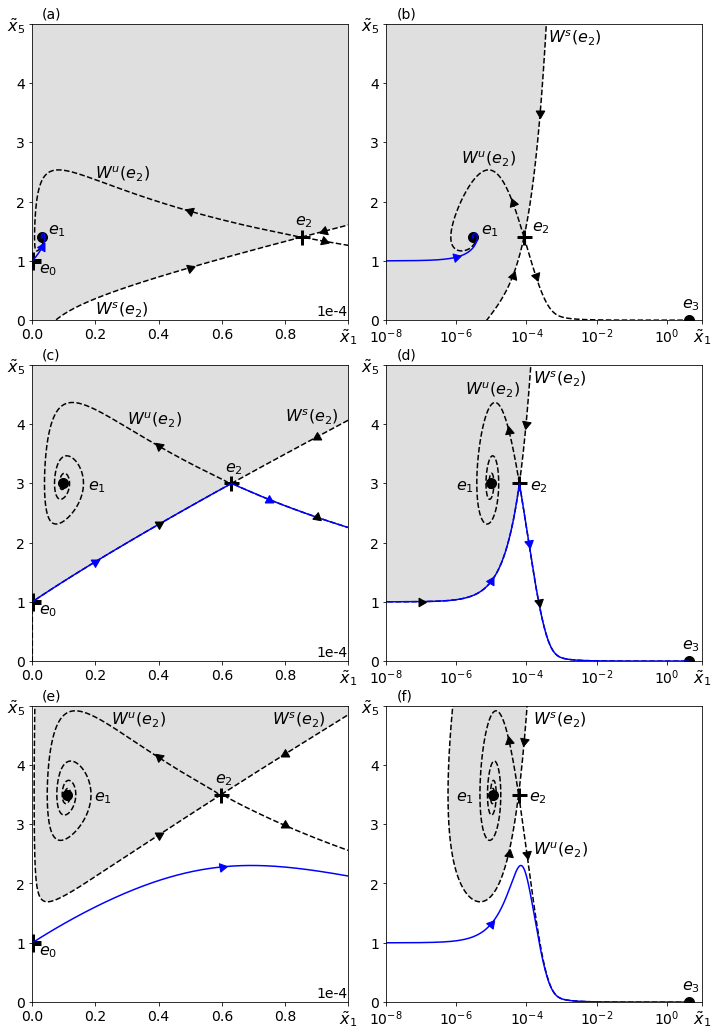

In [20]:
fig, axs = plt.subplots(3,2,figsize=(12,18))



### Linear Scale Pre Heteroclinic

axs[0,0].set_xlim(0,0.0001)
axs[0,0].set_ylim(0,5)


axs[0,0].plot(0,1,'k+',mew=5,markersize=18)
axs[0,0].plot(e2x,e2y,'k+',mew=3,markersize=15)
axs[0,0].plot(e1x,e1y,'ko',markersize=10)

#axs[0,0].plot(10**(-6),1,'b+',markersize=8)


axs[0,0].plot(x1_ls, x5_ls, 'k--',linewidth=1.5)

axs[0,0].plot(x1_us, x5_us, 'k--',linewidth=1.5)

axs[0,0].plot(x1_ru, x5_ru, 'k--',linewidth=1.5)

axs[0,0].plot(x1_lu, x5_lu, 'k--',linewidth=1.5)


axs[0,0].plot(x1_samp, x5_samp, 'b-',linewidth=1.5)


axs[0,0].set_xticks([0,0.00002,0.00004,0.00006,0.00008,0.0001])
axs[0,0].set_xticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{x}_1$'],fontsize=14)

axs[0,0].set_yticks([0,1,2,3,4,5])
axs[0,0].set_yticklabels(['0','1','2','3','4',r'$\tilde{x}_5$'])

axs[0,0].tick_params(axis='both',which='major',labelsize=14)

axs[0,0].get_xticklabels()[-1].set_fontsize(16)
axs[0,0].get_yticklabels()[-1].set_fontsize(16)



### Log-Scale Pre Heteroclinic:

axs[0,1].set_xlim(10**(-8),10)
axs[0,1].set_ylim(0,5)


axs[0,1].plot(0,1,'ko',fillstyle='none',markersize=10)
axs[0,1].plot(e2x,e2y,'k+',mew=3,markersize=15)
axs[0,1].plot(e1x,e1y,'ko',markersize=10)
axs[0,1].plot(e3x,e3y,'ko',markersize=10)

#axs[0,1].plot(10**(-6),1,'b+',markersize=8)


axs[0,1].plot(x1_ls, x5_ls, 'k--',linewidth=1.5)

axs[0,1].plot(x1_us, x5_us, 'k--',linewidth=1.5)

axs[0,1].plot(x1_ru, x5_ru, 'k--',linewidth=1.5)

axs[0,1].plot(x1_lu, x5_lu, 'k--',linewidth=1.5)


axs[0,1].plot(x1_samp, x5_samp, 'b-',linewidth=1.5)

axs[0,1].set_xscale('log',basex=10)

axs[0,1].set_xticks([10**(-8),10**(-6),10**(-4),10**(-2),10**(0),10])
axs[0,1].set_xticklabels([r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{0}$',r'$\tilde{x}_1$'],fontsize=14)

axs[0,1].set_yticks([0,1,2,3,4,5])
axs[0,1].set_yticklabels(['0','1','2','3','4',r'$\tilde{x}_5$'])

axs[0,1].tick_params(axis='both',which='major',labelsize=14)

axs[0,1].get_xticklabels()[-1].set_fontsize(16)
axs[0,1].get_yticklabels()[-1].set_fontsize(16)



### Linear Scale at Heteroclinic

axs[1,0].set_xlim(0,0.0001)
axs[1,0].set_ylim(0,5)


axs[1,0].plot(0,1,'k+',mew=5,markersize=18)
axs[1,0].plot(e2x_at_het,e2y_at_het,'k+',mew=3,markersize=15)
axs[1,0].plot(e1x_at_het,e1y_at_het,'ko',markersize=10)

#axs[1,0].plot(10**(-6),1,'b+',markersize=8)


axs[1,0].plot(x1_ls_at_het, x5_ls_at_het, 'k--',linewidth=1.5)

axs[1,0].plot(x1_us_at_het, x5_us_at_het, 'k--',linewidth=1.5)

axs[1,0].plot(x1_ru_at_het, x5_ru_at_het, 'k--',linewidth=1.5)

axs[1,0].plot(x1_lu_at_het, x5_lu_at_het, 'k--',linewidth=1.5)


axs[1,0].plot(x1_samp_at_het, x5_samp_at_het, 'b-',linewidth=1.5)


axs[1,0].set_xticks([0,0.00002,0.00004,0.00006,0.00008,0.0001])
axs[1,0].set_xticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{x}_1$'],fontsize=14)

axs[1,0].set_yticks([0,1,2,3,4,5])
axs[1,0].set_yticklabels(['0','1','2','3','4',r'$\tilde{x}_5$'])

axs[1,0].tick_params(axis='both',which='major',labelsize=14)

axs[1,0].get_xticklabels()[-1].set_fontsize(16)
axs[1,0].get_yticklabels()[-1].set_fontsize(16)



### Log-Scale Pre Heteroclinic:

axs[1,1].set_xlim(10**(-8),10)
axs[1,1].set_ylim(0,5)


axs[1,1].plot(0,1,'ko',fillstyle='none',markersize=10)
axs[1,1].plot(e2x_at_het,e2y_at_het,'k+',mew=3,markersize=15)
axs[1,1].plot(e1x_at_het,e1y_at_het,'ko',markersize=10)
axs[1,1].plot(e3x_at_het,e3y_at_het,'ko',markersize=10)

#axs[1,1].plot(10**(-6),1,'b+',markersize=8)


axs[1,1].plot(x1_ls_at_het, x5_ls_at_het, 'k--',linewidth=1.5)

axs[1,1].plot(x1_us_at_het, x5_us_at_het, 'k--',linewidth=1.5)

axs[1,1].plot(x1_ru_at_het, x5_ru_at_het, 'k--',linewidth=1.5)

axs[1,1].plot(x1_lu_at_het, x5_lu_at_het, 'k--',linewidth=1.5)


axs[1,1].plot(x1_samp_at_het, x5_samp_at_het, 'b-',linewidth=1.5)

axs[1,1].set_xscale('log',basex=10)

axs[1,1].set_xticks([10**(-8),10**(-6),10**(-4),10**(-2),10**(0),10])
axs[1,1].set_xticklabels([r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{0}$',r'$\tilde{x}_1$'],fontsize=14)

axs[1,1].set_yticks([0,1,2,3,4,5])
axs[1,1].set_yticklabels(['0','1','2','3','4',r'$\tilde{x}_5$'])

axs[1,1].tick_params(axis='both',which='major',labelsize=14)

axs[1,1].get_xticklabels()[-1].set_fontsize(16)
axs[1,1].get_yticklabels()[-1].set_fontsize(16)



### Linear Scale after Heteroclinic

axs[2,0].set_xlim(0,0.0001)
axs[2,0].set_ylim(0,5)


axs[2,0].plot(0,1,'k+',mew=5,markersize=18)
axs[2,0].plot(e2x_after_het,e2y_after_het,'k+',mew=3,markersize=15)
axs[2,0].plot(e1x_after_het,e1y_after_het,'ko',markersize=10)

#axs[2,0].plot(10**(-6),1,'b+',markersize=8)


axs[2,0].plot(x1_ls_after_het, x5_ls_after_het, 'k--',linewidth=1.5)

axs[2,0].plot(x1_us_after_het, x5_us_after_het, 'k--',linewidth=1.5)

axs[2,0].plot(x1_ru_after_het, x5_ru_after_het, 'k--',linewidth=1.5)

axs[2,0].plot(x1_lu_after_het, x5_lu_after_het, 'k--',linewidth=1.5)


axs[2,0].plot(x1_samp_after_het, x5_samp_after_het, 'b-',linewidth=1.5)


axs[2,0].set_xticks([0,0.00002,0.00004,0.00006,0.00008,0.0001])
axs[2,0].set_xticklabels(['0.0','0.2','0.4','0.6','0.8',r'$\tilde{x}_1$'],fontsize=14)

axs[2,0].set_yticks([0,1,2,3,4,5])
axs[2,0].set_yticklabels(['0','1','2','3','4',r'$\tilde{x}_5$'])

axs[2,0].tick_params(axis='both',which='major',labelsize=14)

axs[2,0].get_xticklabels()[-1].set_fontsize(16)
axs[2,0].get_yticklabels()[-1].set_fontsize(16)



### Log-Scale Pre Heteroclinic:

axs[2,1].set_xlim(10**(-8),10)
axs[2,1].set_ylim(0,5)


axs[2,1].plot(0,1,'ko',fillstyle='none',markersize=10)
axs[2,1].plot(e2x_after_het,e2y_after_het,'k+',mew=3,markersize=15)
axs[2,1].plot(e1x_after_het,e1y_after_het,'ko',markersize=10)
axs[2,1].plot(e3x_after_het,e3y_after_het,'ko',markersize=10)

#axs[2,1].plot(10**(-6),1,'b+',markersize=8)


axs[2,1].plot(x1_ls_after_het, x5_ls_after_het, 'k--',linewidth=1.5)

axs[2,1].plot(x1_us_after_het, x5_us_after_het, 'k--',linewidth=1.5)

axs[2,1].plot(x1_ru_after_het, x5_ru_after_het, 'k--',linewidth=1.5)

axs[2,1].plot(x1_lu_after_het, x5_lu_after_het, 'k--',linewidth=1.5)


axs[2,1].plot(x1_samp_after_het, x5_samp_after_het, 'b-',linewidth=1.5)

axs[2,1].set_xscale('log',basex=10)

axs[2,1].set_xticks([10**(-8),10**(-6),10**(-4),10**(-2),10**(0),10])
axs[2,1].set_xticklabels([r'$10^{-8}$',r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{0}$',r'$\tilde{x}_1$'],fontsize=14)

axs[2,1].set_yticks([0,1,2,3,4,5])
axs[2,1].set_yticklabels(['0','1','2','3','4',r'$\tilde{x}_5$'])

axs[2,1].tick_params(axis='both',which='major',labelsize=14)

axs[2,1].get_xticklabels()[-1].set_fontsize(16)
axs[2,1].get_yticklabels()[-1].set_fontsize(16)



### Extra Details: 

axs[0,0].text(0.000003,5.1,'(a)',fontsize=14)
axs[1,0].text(0.000003,5.1,'(c)',fontsize=14)
axs[2,0].text(0.000003,5.1,'(e)',fontsize=14)

axs[0,1].text(0.00000002,5.1,'(b)',fontsize=14)
axs[1,1].text(0.00000002,5.1,'(d)',fontsize=14)
axs[2,1].text(0.00000002,5.1,'(f)',fontsize=14)

axs[0,0].text(0.00009,0.08,'1e-4',fontsize=14)
axs[1,0].text(0.00009,0.08,'1e-4',fontsize=14)
axs[2,0].text(0.00009,0.08,'1e-4',fontsize=14)




###############################################################
##### ADDING GREY BACKGROUND TO SHOW BASINS OF ATTRACTION #####
###############################################################

# axs00:

x5s_joined = np.concatenate((x5_ls[2370::-1],x5_us[:176067]))
x1s_joined = np.concatenate((x1_ls[2370::-1],x1_us[:176067]))

x5s_padded = np.concatenate((np.array([0]),x5s_joined,np.array([5])))
x1s_padded = np.concatenate((np.array([0]),x1s_joined,np.array([0.0001])))

y = 5*np.ones(len(x1s_padded))

axs[0,0].fill_between(x1s_padded,x5s_padded,y,facecolor='grey', alpha=0.25, interpolate=True)


# axs01:

x5s_joined = np.concatenate((x5_ls[2370::-1],x5_us[:204876]))
x1s_joined = np.concatenate((x1_ls[2370::-1],x1_us[:204876]))

x5s_padded = np.concatenate((np.array([0]),x5s_joined,np.array([5])))
x1s_padded = np.concatenate((np.array([0]),x1s_joined,np.array([10])))

y = 5*np.ones(len(x1s_padded))

axs[0,1].fill_between(x1s_padded,x5s_padded,y,facecolor='grey', alpha=0.25, interpolate=True)


# axs10:

x5s_joined = np.concatenate((x5_ls_at_het[5447::-1],x5_us_at_het[:281742]))
x1s_joined = np.concatenate((x1_ls_at_het[5447::-1],x1_us_at_het[:281742]))

x5s_padded = np.concatenate((np.array([1]),x5s_joined,np.array([5])))
x1s_padded = np.concatenate((np.array([0]),x1s_joined,np.array([10])))

y = 5*np.ones(len(x1s_padded))

axs[1,0].fill_between(x1s_padded,x5s_padded,y,facecolor='grey', alpha=0.25, interpolate=True)


# axs11:

x5s_joined = np.concatenate((x5_ls_at_het[5447::-1],x5_us_at_het[:290202]))
x1s_joined = np.concatenate((x1_ls_at_het[5447::-1],x1_us_at_het[:290202]))

x5s_padded = np.concatenate((np.array([0]),x5s_joined,np.array([5])))
x1s_padded = np.concatenate((np.array([0]),x1s_joined,np.array([10])))

y = 5*np.ones(len(x1s_padded))

axs[1,1].fill_between(x1s_padded,x5s_padded,y,facecolor='grey', alpha=0.25, interpolate=True)


# axs20:

x5s_joined = np.concatenate((x5_ls_after_het[4822::-1],x5_us_after_het[:292253]))
x1s_joined = np.concatenate((x1_ls_after_het[4822::-1],x1_us_after_het[:292253]))

x5s_padded = np.concatenate((np.array([5]),x5s_joined,np.array([5])))
x1s_padded = np.concatenate((np.array([0]),x1s_joined,np.array([0.0001])))

y = 5*np.ones(len(x1s_padded))

axs[2,0].fill_between(x1s_padded,x5s_padded,y,facecolor='grey', alpha=0.25, interpolate=True)


# axs21:

x5s_joined = np.concatenate((x5_ls_after_het[4822::-1],x5_us_after_het[:292253]))
x1s_joined = np.concatenate((x1_ls_after_het[4822::-1],x1_us_after_het[:292253]))

x5s_padded = np.concatenate((np.array([5]),x5s_joined,np.array([5])))
x1s_padded = np.concatenate((np.array([0]),x1s_joined,np.array([10])))

y = 5*np.ones(len(x1s_padded))

axs[2,1].fill_between(x1s_padded,x5s_padded,y,facecolor='grey', alpha=0.25, interpolate=True)

###############################################################




####################################################
##### ADDING ANNOTATIONS OF EQUILIBRIUM POINTS #####
####################################################

#axs00:

axs[0,0].text(e1x+0.000002,e1y+0.05,'$e_{1}$',fontsize=16)
axs[0,0].text(0.000002,1-0.2,'$e_{0}$',fontsize=16)
axs[0,0].text(e2x-0.000002,e2y+0.2,'$e_{2}$',fontsize=16)
#axs[1,0].text(e3x-1.5,e3y+0.2,'$e_{3}$',fontsize=16)


#axs01:

axs[0,1].text(e1x+0.000002,e1y+0.05,'$e_{1}$',fontsize=16)
#axs[0,1].text(0.000002,1-0.2,'$e_{0}$',fontsize=16)
axs[0,1].text(e2x+0.00006,e2y+0.1,'$e_{2}$',fontsize=16)
axs[0,1].text(e3x-1.5,e3y+0.2,'$e_{3}$',fontsize=16)


#axs10:

axs[1,0].text(e1x_at_het+0.000008,e1y_at_het-0.1,'$e_{1}$',fontsize=16)
axs[1,0].text(0.000002,1-0.2,'$e_{0}$',fontsize=16)
axs[1,0].text(e2x_at_het-0.000002,e2y_at_het+0.2,'$e_{2}$',fontsize=16)
#axs[1,0].text(e3x-1.5,e3y+0.2,'$e_{3}$',fontsize=16)


#axs11:

axs[1,1].text(10**(-6),e1y_at_het-0.1,'$e_{1}$',fontsize=16)
#axs[1,0].text(0.000002,1-0.2,'$e_{0}$',fontsize=16)
axs[1,1].text(e2x_at_het+0.00006,e2y_at_het-0.1,'$e_{2}$',fontsize=16)
axs[1,1].text(e3x_at_het-1.5,e3y_at_het+0.2,'$e_{3}$',fontsize=16)


#axs20:

axs[2,0].text(e1x_after_het+0.0000085,e1y_after_het-0.1,'$e_{1}$',fontsize=16)
axs[2,0].text(0.000002,1-0.2,'$e_{0}$',fontsize=16)
axs[2,0].text(e2x_after_het-0.000002,e2y_after_het+0.2,'$e_{2}$',fontsize=16)
#axs[2,0].text(e3x_at_het-1.5,e3y_at_het+0.2,'$e_{3}$',fontsize=16)


#axs21:

axs[2,1].text(10**(-6),e1y_after_het-0.1,'$e_{1}$',fontsize=16)
#axs[2,1].text(0.000002,1-0.2,'$e_{0}$',fontsize=16)
axs[2,1].text(e2x_after_het+0.00006,e2y_after_het-0.1,'$e_{2}$',fontsize=16)
axs[2,1].text(e3x_after_het-1.5,e3y_after_het+0.2,'$e_{3}$',fontsize=16)

####################################################




##################################################
##### ADDING ANNOTATIONS OF STABLE MANIFOLDS #####
##################################################

# axs00:

axs[0,0].text(0.00002,0.1,r'$W^s(e_2)$',fontsize=16)
axs[0,0].text(0.00002,2.4,r'$W^u(e_2)$',fontsize=16)


# axs01:

axs[0,1].text(0.0004,4.7,r'$W^s(e_2)$',fontsize=16)
axs[0,1].text(1.4e-06,2.65,r'$W^u(e_2)$',fontsize=16)


# axs10:

axs[1,0].text(0.00008,4.05,r'$W^s(e_2)$',fontsize=16)
axs[1,0].text(0.00003,4,r'$W^u(e_2)$',fontsize=16)


# axs11:

axs[1,1].text(0.00015,4.7,r'$W^s(e_2)$',fontsize=16)
axs[1,1].text(1.8e-06,4.5,r'$W^u(e_2)$',fontsize=16)


# axs20:

axs[2,0].text(0.000076,4.7,r'$W^s(e_2)$',fontsize=16)
axs[2,0].text(0.000025,4.7,r'$W^u(e_2)$',fontsize=16)


# axs21:

axs[2,1].text(0.00015,4.7,r'$W^s(e_2)$',fontsize=16)
axs[2,1].text(10**(-3.8),2.5,r'$W^u(e_2)$',fontsize=16)

##################################################




#########################################
##### ADDING ARROWS TO TRAJECTORIES #####
#########################################

# axs00:

axs[0,0].plot(0.00005, 0.8873143148807359, marker=(3,0,-70), markersize=10,color='k')
axs[0,0].plot(0.00005, 1.8357584489001766, marker=(3,0,70), markersize=10,color='k')

axs[0,0].plot(9.25e-05,1.3295931784601471,marker=(3,0,250),markersize=10,color='k')
axs[0,0].plot(9.25e-05,1.500724614095985,marker=(3,0,-250),markersize=10,color='k')

axs[0,0].plot(x1_samp[3223],x5_samp[3223],marker=(3,0,-30),markersize=10,color='b')


# axs01:

axs[0,1].plot(0.0002471415154119163, 3.5, marker=(3,0,180), markersize=10,color='k')
axs[0,1].plot(4.1309286321159694e-05, 0.75, marker=(3,0,-20), markersize=10,color='k')

axs[0,1].plot(4.1309286321159694e-05,1.9737295178917333,marker=(3,0,20),markersize=10,color='k')
axs[0,1].plot(0.0001833409076522476,0.75,marker=(3,0,-160),markersize=10,color='k')

axs[0,1].plot(x1_samp[2382],x5_samp[2382],marker=(3,0,-75),markersize=10,color='b')


# axs10:

axs[1,0].plot(x1_lu_at_het[1133], x5_lu_at_het[1133], marker=(3,0,50), markersize=10,color='k')
axs[1,0].plot(x1_ls_at_het[2732], x5_ls_at_het[2732], marker=(3,0,-60), markersize=10,color='k')

axs[1,0].plot(x1_us_at_het[276805],x5_us_at_het[276805],marker=(3,0,120),markersize=10,color='k')
axs[1,0].plot(x1_ru_at_het[102654],x5_ru_at_het[102654],marker=(3,0,-130),markersize=10,color='k')

axs[1,0].plot(x1_samp_at_het[172101],x5_samp_at_het[172101],marker=(3,0,-60),markersize=10,color='b')
axs[1,0].plot(x1_samp_at_het[473085],x5_samp_at_het[473085],marker=(3,0,-120),markersize=10,color='b')

# axs11:

axs[1,1].plot(x1_us_at_het[280831], x5_us_at_het[280831], marker=(3,0,170), markersize=10,color='k')
axs[1,1].plot(x1_ls_at_het[4254], x5_ls_at_het[4254], marker=(3,0,-90), markersize=10,color='k')

axs[1,1].plot(x1_lu_at_het[1266],x5_lu_at_het[1266],marker=(3,0,10),markersize=10,color='k')
axs[1,1].plot(x1_ru_at_het[136234],x5_ru_at_het[136234],marker=(3,0,-170),markersize=10,color='k')

axs[1,1].plot(x1_samp_at_het[152265],x5_samp_at_het[152265],marker=(3,0,-30),markersize=10,color='b')
axs[1,1].plot(x1_samp_at_het[506975],x5_samp_at_het[506975],marker=(3,0,-170),markersize=10,color='b')



# axs20:

axs[2,0].plot(x1_lu_after_het[1132], x5_lu_after_het[1132], marker=(3,0,50), markersize=10,color='k')
axs[2,0].plot(x1_ls_after_het[2992], x5_ls_after_het[2992], marker=(3,0,-60), markersize=10,color='k')

axs[2,0].plot(x1_us_after_het[279058],x5_us_after_het[279058],marker=(3,0,120),markersize=10,color='k')
axs[2,0].plot(x1_ru_after_het[99840],x5_ru_after_het[99840],marker=(3,0,-120),markersize=10,color='k')

axs[2,0].plot(x1_samp_after_het[194013],x5_samp_after_het[194013],marker=(3,0,-80),markersize=10,color='b')


# axs21:

axs[2,1].plot(x1_us_after_het[284074], x5_us_after_het[284074], marker=(3,0,170), markersize=10,color='k')
axs[2,1].plot(x1_ls_after_het[3145], x5_ls_after_het[3145], marker=(3,0,-10), markersize=10,color='k')

axs[2,1].plot(x1_lu_after_het[1275],x5_lu_after_het[1275],marker=(3,0,10),markersize=10,color='k')
axs[2,1].plot(x1_ru_after_het[117137],x5_ru_after_het[117137],marker=(3,0,-170),markersize=10,color='k')

axs[2,1].plot(x1_samp_after_het[140992],x5_samp_after_het[140992],marker=(3,0,-40),markersize=10,color='b')

#########################################



plt.subplots_adjust(hspace=0.15,wspace=0.12)